<a href="https://colab.research.google.com/github/StacyChebet/Titanic-Machine-Learning-from-Disaster/blob/master/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis using "Titanic: Machine Learning from Disaster" dataset on Kaggle. <br><br>
**Dataset Overview** <br>
This dataset is a classic example used in machine learning and data analysis, containing information about the passengers of the Titanic, which sank in 1912. <br><br>

**Dataset Description** <br>
The dataset includes the following files:

**train.csv:** The training set, containing features and the target variable.<br>
**test.csv:** The test set, containing only features and used for model evaluation.<br>
**gender_submission.csv:** An example of a submission file in the correct format. <br><br>
**Features in the Dataset**<br>
**PassengerId:** Unique ID for each passenger <br>
**Survived:** Target variable indicating if the passenger survived (1) or not (0)<br>
**Pclass:** Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)<br>
**Name:** Passenger’s name <br>
**Sex:** Passenger’s gender <br>
**Age:** Passenger’s age <br>
**SibSp:** Number of siblings/spouses aboard the Titanic <br>
**Parch:** Number of parents/children aboard the Titanic <br>
**Ticket:** Ticket number <br>
**Fare:** Fare paid for the ticket <br>
**Cabin:** Cabin number <br>
**Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# **Loading Libraries and Data** <br>
Libraries used: <br>
**Pandas:** For data manipulation <br>
**Numpy:** For numerical operations <br>
**Seaborn:** For data visualization

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting visualization styles
sns.set(style="whitegrid")

#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#Changing directory
%cd /content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Titanic

#Loading the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

#Displaying the first few rows of the dataset
df.head()

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/Titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Initial Data Exploration**
In this step, we will conduct an initial exploration of the dataset to understand its structure and basic characteristics. We will:<br>
1. Check the shape of the dataset <br>
2. Display the data types of each column <br>
3. Get a summary of the dataset using descriptive statistics

In [2]:
#Checking the shape of the dataset
print(f"The data set contains {df.shape[0]} rows and {df.shape[1]} columns.")

#Displaying the data types of each column
print("\nData types of each column:")
print("df.dtypes")

#Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)

The data set contains 891 rows and 12 columns.

Data types of each column:
df.dtypes

Summary of the dataset:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  


# **Findings**
**1. Dataset Overview:**
*   The dataset contains 891 rows and 12 columns.
*  Features include both **numerical** (e.g., Age, Fare) and **categorical** (e.g., Sex, Embarked) variables. <br>

**Key Insights:**
*   **Survival Rate:** Approximately 38.38% of passengers survived.
*   **Class Distribution:** Most passengers were in the 3rd class.
*   **Missing Values:** Significant missing values in Age (177 missing).
*   **Fare:** The ticket prices varied widely, with a mean fare of 32.20 and a maximum fare of 512.33.





# **Identifying Categorical and Numerical Variables**
**Categorical Variables:** Variables that represent categories or labels. <br>
**Numerical Variables:** Variables that represent quantitative data. <br>

In this step, we will create two separate lists for categorical and numerical variables based on their data types.

In [3]:
#Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# **Univariate Analysis**
- Involves the examination and analysis of a single variable. <br>
- **Purpose** - describe and summarize the data, understand its distribution, central tendency, and variability. <br>
- Provides the foundational understanding of each variable independently before exploring relationships between multiple variables.<br>
## **Types of Univariate Analysis**
1. **For Numerical Variables**
- **Histogram** - Graphical representation of the distribution of numerical data.
 - Helps in understanding the frequency
distribution, identifying skewness, and detecting outliers.
- **Box Plot** - Standardized way of displaying the distribution of data based on a five-number summary: **minimum**, **first quartile (Q1)**, **median**, **third quartile (Q3)** and **maximum**.
 - Useful in identifying outliers and understanding thr spread and symmetry of the data.
- **Summary Statistics** - Includes measures such as mean, median, mode, standard deviation, variance, minimum, maximum, and quartiles which provide a numerical summary of the data's central tendency and dispersion.

2. **For Categorical Variables**
- **Bar Plot** - A visual representation of the frequency or count of categories within a categorical variable.
 - Help in understanding the distribution and proportion of different categories.
- **Pie Chart** - A circular statistical graphic that illustrates the relative proportions of different categories.
  - Useful for showing the parts of a whole.
- **Frequency Table** - A table that displays the frequency count of each category.
 - Provides a clear numerical summary of the distribution of categorical variables.

## **Univariate Analysis for Numerical Variables**
1. **Histograms**

In [4]:
numerical_vars

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

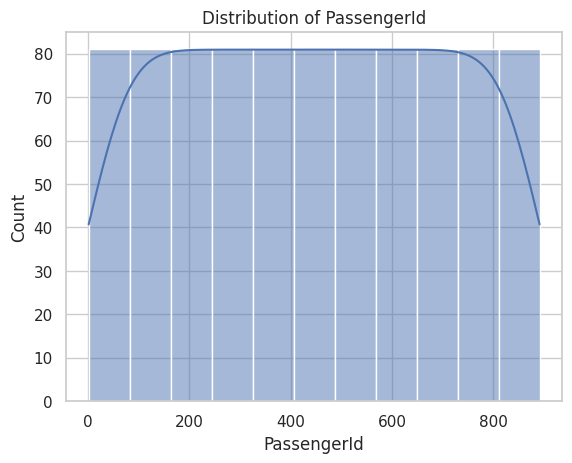

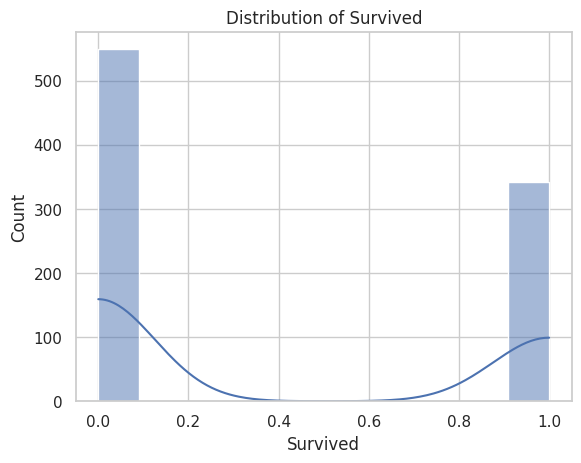

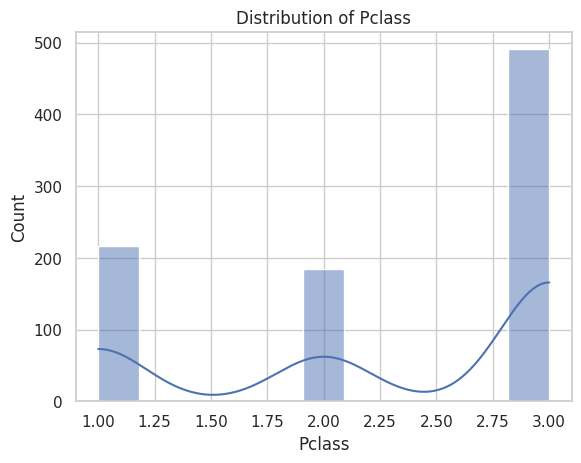

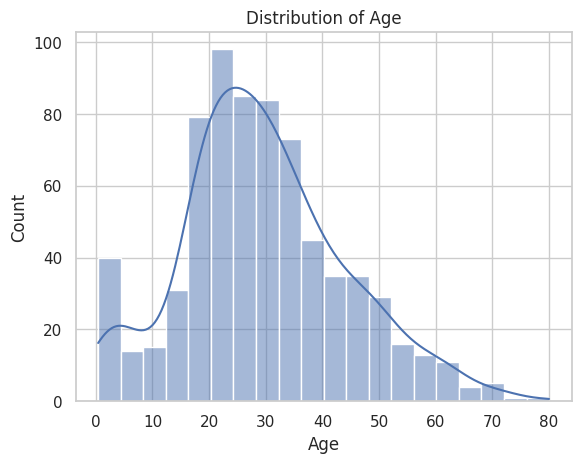

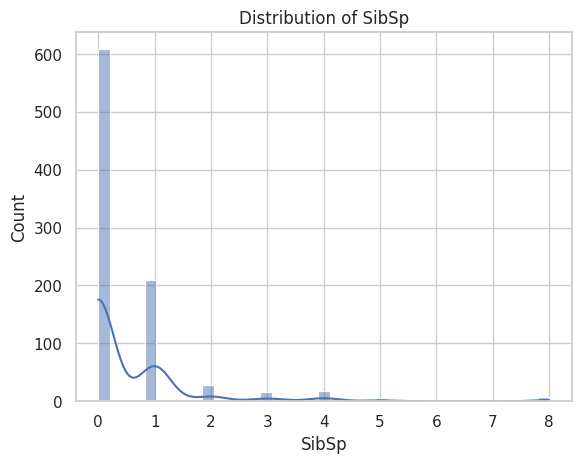

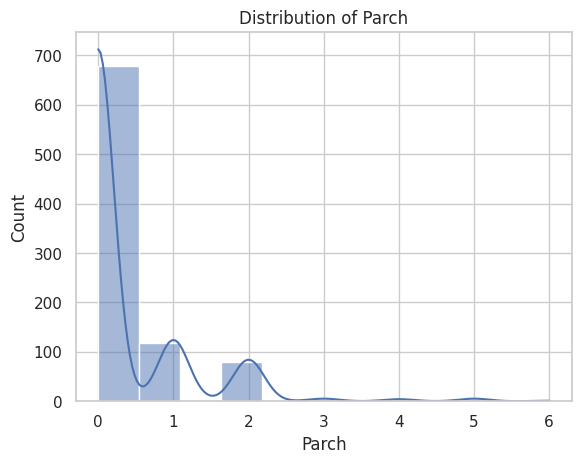

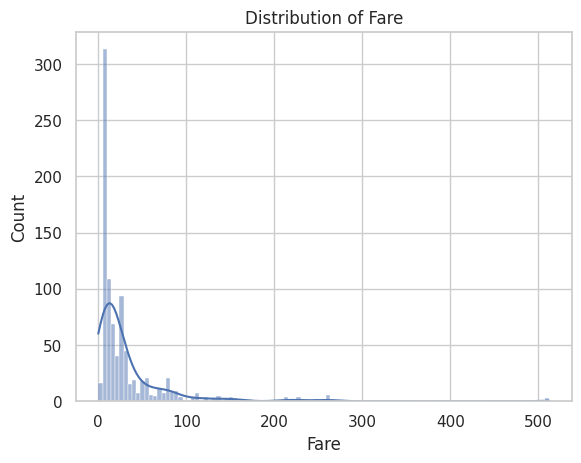

In [5]:
#Univariate Analysis for numerical variables
for var in numerical_vars:
  sns.histplot(df[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()

## **Histogram Findings**
1. **PassengerId**:
 - Uniform distribution across all IDs.
 - This variable serves as a unique identifier and does not provide analytical value.
 - **Recommendation**: Drop PassengerId.
2. **Survived**:
 - Binary distribution with a larger number of non-survivors (0) compared to survivors (1).
3. **Pclass**:
 - Most passengers belong to the 3rd class, followed by 1st and 2nd classes.
4. **Age**:
 - Approximately normal distribution with a peak around 20-30 years.
 - Notable number of missing values (177 out of 891).
5. **SibSp**:
 - Majority of passengers have 0 siblings/spouses aboard.
 - Few passengers have more than 3 siblings/spouses.
6. **Parch**:
 - Majority of passengers have 0 parents/children aboard.
 - Few passengers have more than 2 parents/children aboard.
7. **Fare**:
 - Right-skewed distribution with most fares concentrated at the lower end.
 - Some outliers with very high fares.

## **Dropping Unnecessary Columns**
To streamline our dataset, we will drop columns that do not provide significant analytical value. <br>
These columns are:
- **PassengerId** - Unique identifier for each passenger.
- **Name** - Interesting but is not directly useful for analysis.
- **Ticket** - Many unique values with limited analytical value.
- **Cabin** - Significant number of missing values.

In [6]:
#Dropping unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

#Display the first few rows to confirm changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


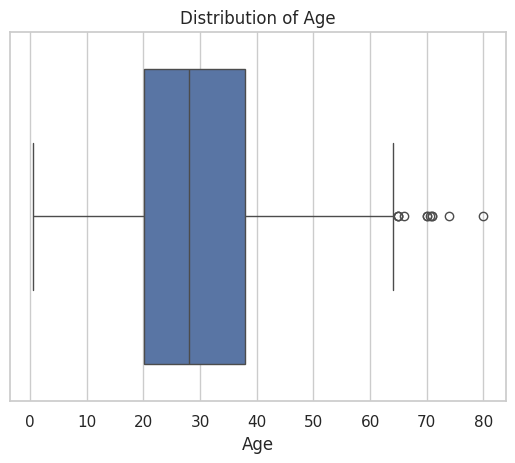

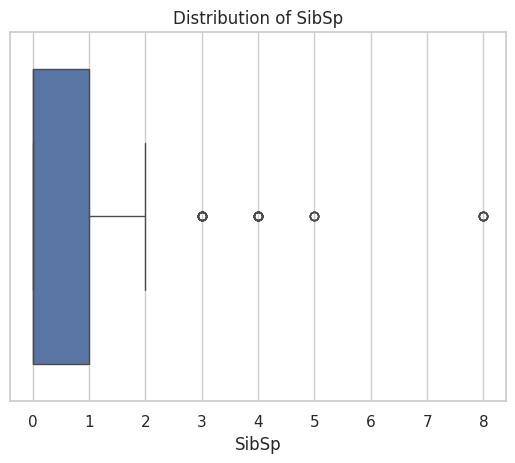

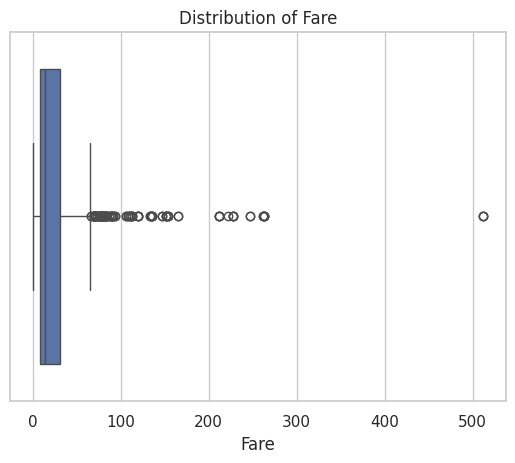

In [7]:
# Box Plot
for var in ['Age', 'SibSp', 'Fare']:
  sns.boxplot(x=df[var].dropna())
  plt.title(f'Distribution of {var}')
  plt.show()

## **Box Plot Findings**
 ### **Age**
- **Distribution:**
 - The majority of passengers are between 20 and 40 years old.
 - The median age is around 28 years.
 - There are several outliers on the higher end, with ages extending up to 80 years.
- **Implications:**
 - This indicates that while most passengers are relatively young, there are a few significantly older individuals.

### **SibSp (Siblings/Spouses Aboard)**
- **Distribution**
 - The majority of passengers have 0 siblings or spouses aboard.
 - The median number of siblings/spouses is 0.
 - There are a few outliers with up to 8 siblings/spouses.
- **Implications:**
 - Most passengers traveled alone or with one other person, indicating small family units or solo travelers.

### **Fare**
- **Distribution**
 - The majority of fares are concentrated below 100.
 - The median fare is relatively low.
 - There are several outliers with fares going up to over 500.
- **Implications**
 - Most passengers paid low fares, but there are a few who paid significantly higher, possibly first-class accommodations.


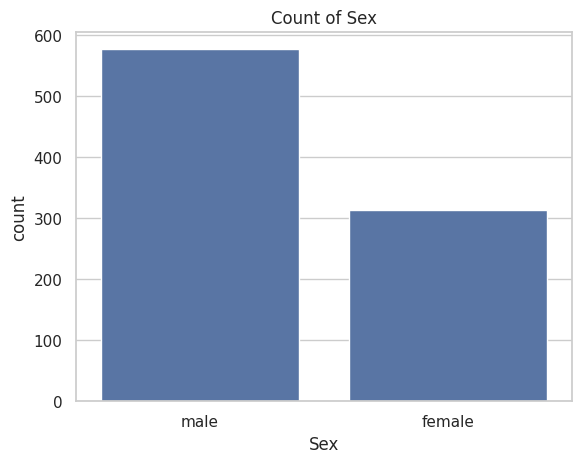

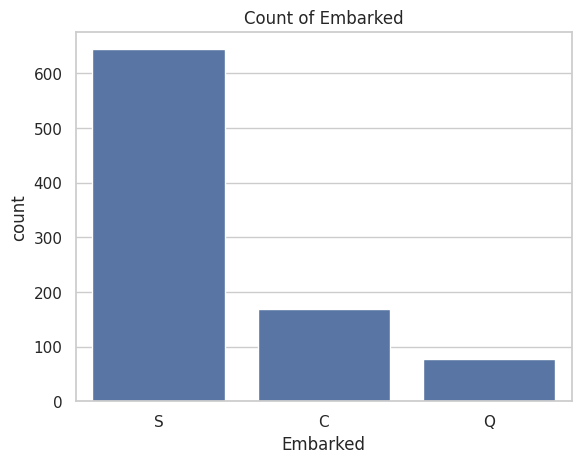

In [10]:
#Remake the categorical variables excluding the dropped ones
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

#Univariate analysis for categorical variables
for var in categorical_vars:
  sns.countplot(x=var, data=df)
  plt.title(f'Count of {var}')
  plt.show()

## **Insights from Univariate Analysis of Categorical Variables**
#### **Sex**
- **Distribution:**
 - The majority of passengers were male (Approximately 65%)
 - Females made up a smaller proportion of the passengers (Approximately 35%)

- **Implications:**
 - This gender distribution will be important when analyzing survival rates since historical records suggest that women and children were given priority during the evacuation.

#### **Embarked**
- **Distribution:**
 - Most passengers embarked from Southampton (S), making up about 72% of the dataset.
 - Cherboug (C) was the second most common embarkation point, with around 19%.
 - Queenstown (Q) had the fewest passengers, with about 9%.

- **Implications:**
 - The point of embarkation might have an impact on survival rates and class distribution. For instance, passengers embarking from different ports might have different socio-economic backgrounds or class distributions.

 ## **Next Steps**
 1. **Handle Missing Values:**
  - Embarked has 2 missing values that need to be addressed.
 2. **Bivariate Analysis and Multivariate Analysis**
  - Investigate the relationship between these categorical variables and the target variable (survived).
  - Explore if there is any correlation between embarkation points, gender, and survival rates.